# **Load data from Kaggle**

In [3]:
# For more details please look: https://medium.com/@opalkabert/downloading-kaggle-datasets-into-google-colab-fb9654c94235
#@title Upload kaggle.json file and download dataset
from google.colab import files
files.upload()
# Copy file to the right directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permissions owner can read and write
!chmod 600 /root/.kaggle/kaggle.json

# download the dataset
!kaggle competitions download -c jigsaw-unintended-bias-in-toxicity-classification

Saving kaggle.json to kaggle.json
 73% 9.00M/12.3M [00:00<00:00, 23.9MB/s]
100% 12.3M/12.3M [00:00<00:00, 31.1MB/s]
 74% 48.0M/64.7M [00:00<00:00, 60.0MB/s]
100% 64.7M/64.7M [00:00<00:00, 102MB/s] 
 93% 257M/276M [00:02<00:00, 84.2MB/s]
100% 276M/276M [00:03<00:00, 95.8MB/s]
  0% 0.00/224k [00:00<?, ?B/s]
100% 224k/224k [00:00<00:00, 74.2MB/s]
 88% 14.0M/15.9M [00:00<00:00, 13.1MB/s]
100% 15.9M/15.9M [00:00<00:00, 25.0MB/s]
 32% 5.00M/15.8M [00:00<00:00, 12.3MB/s]
100% 15.8M/15.8M [00:00<00:00, 32.1MB/s]
 41% 5.00M/12.1M [00:00<00:00, 9.03MB/s]
100% 12.1M/12.1M [00:00<00:00, 20.5MB/s]


# **Load data**

In [0]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()

In [5]:
# unzip csv files with training and test datasets
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


In [0]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# **Data preprocessing**

In [11]:
train_df.shape

(1804874, 45)

In [0]:
# drop redundant columns
train_df.drop(['created_date', 'publication_id', 'parent_id', 'article_id',
               'rating', 'funny', 'wow', 'sad', 'likes', 'disagree',
               'identity_annotator_count', 'toxicity_annotator_count'], axis=1, inplace=True)

In [13]:
train_df.shape

(1804874, 33)

In [14]:
train_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,sexual_explicit
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data visualization**

In [0]:
# Comment is considered to be toxic if value of target is >= 0.5
toxic = train_df.loc[train_df['target'] >= 0.5].shape[0]
non_toxic = train_df.shape[0] - toxic

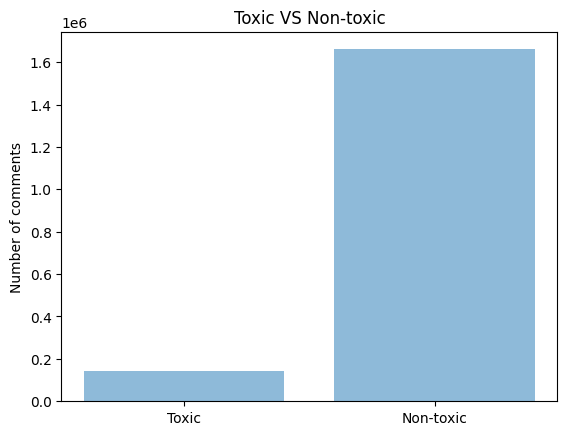

In [16]:
objects = ('Toxic', 'Non-toxic')
y_pos = np.arange(len(objects))
performance = [toxic, non_toxic]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of comments')
plt.title('Toxic VS Non-toxic')

plt.show()

In [0]:
severe_toxicity_count = train_df.loc[train_df["severe_toxicity"] > 0].shape[0]
obscene_count = train_df.loc[train_df["obscene"] > 0].shape[0]
threat_count = train_df.loc[train_df["threat"] > 0].shape[0]
insult_count = train_df.loc[train_df["insult"] > 0].shape[0]
identity_attack_count = train_df.loc[train_df["identity_attack"] > 0].shape[0]
sexual_explicit_count = train_df.loc[train_df["sexual_explicit"] > 0].shape[0]

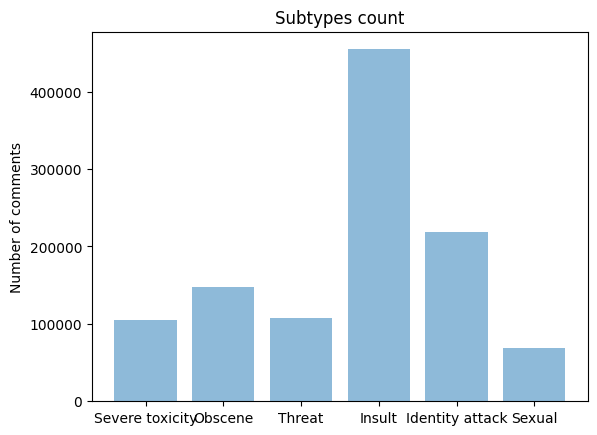

In [18]:
objects = ('Severe toxicity', 'Obscene', 'Threat', 'Insult', 'Identity attack', 'Sexual')
y_pos = np.arange(len(objects))
performance = [severe_toxicity_count, obscene_count, threat_count, insult_count, identity_attack_count, sexual_explicit_count]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of comments')
plt.title('Subtypes count')

plt.show()